# Summarizing metrics from single lines

Leanne Friedrich 08/02/21

## initialization

In [2]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [3]:
import os
import sys
sys.path.append("../")
from py.config import cfg
import py.logs as logs
import py.metrics as me
from printVals import *
from plainIm import plainIm
import matplotlib.pyplot as plt
import metricPlots as mp
import regression as rg
LOGGERDEFINED = logs.openLog('vidSummaries.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

## analyzing data

In [84]:
ss,u = plainIm(os.path.join(cfg.path.fig, 'stillsSummary.csv'), ic=0)
ss = ss[ss.date>210500]
ss.date = ss.date.replace(210728, 210727)
# ss['ink_surfactant']=ss['ink_surfactant'].fillna('')
# ss['ink_type'] = [row['ink_base']+row['ink_surfactant'] for i,row in ss.iterrows()]

In [162]:
ss.date.unique()

array([210727., 210728., 210517., 210519., 210824., 210518., 210630.,
       210713.])

In [163]:
ss.ink_type.unique()

array(['water', 'mineral oil', 'mineral oil_Span 20', 'PDMS_3_mineral_25',
       'PDMS_3_silicone_25', 'PEGDA_40'], dtype=object)

In [185]:
ss.keys()

Index(['bn', 'date', 'sigma', 'di', 'do', 'fluFile', 'calibFile', 'viscRatio',
       'vRatio', 'ReRatio', 'rGrav', 'dEst', 'ink_shortname', 'ink_days',
       'ink_rheModifier', 'ink_surfactant', 'ink_dye', 'ink_var', 'ink_val',
       'ink_base', 'ink_type', 'ink_tau0', 'ink_eta0', 'ink_v', 'ink_visc0',
       'ink_CaInv', 'ink_Re', 'ink_WeInv', 'ink_OhInv', 'ink_rPR',
       'sup_shortname', 'sup_days', 'sup_rheModifier', 'sup_surfactant',
       'sup_dye', 'sup_var', 'sup_val', 'sup_base', 'sup_type', 'sup_tau0',
       'sup_eta0', 'sup_v', 'sup_visc0', 'sup_CaInv', 'sup_Re', 'sup_WeInv',
       'sup_OhInv', 'sup_rPR', 'xs_aspect', 'xs_xshift', 'xs_yshift',
       'xs_areaN', 'xs_wN', 'xs_hN', 'xs_roughness', 'xs_aspect_SE',
       'xs_xshift_SE', 'xs_yshift_SE', 'xs_areaN_SE', 'xs_wN_SE', 'xs_hN_SE',
       'xs_roughness_SE', 'vert_wN', 'vert_hN', 'vert_vN', 'vert_roughness',
       'vert_meanTN', 'vert_stdevTN', 'vert_minmaxTN', 'vert_wN_SE',
       'vert_hN_SE', 'vert_vN_SE', 'v

# verticals

In [478]:
ss.keys()

Index(['bn', 'date', 'sigma', 'di', 'do', 'fluFile', 'calibFile', 'viscRatio',
       'vRatio', 'ReRatio', 'rGrav', 'dEst', 'ink_shortname', 'ink_days',
       'ink_rheModifier', 'ink_surfactant', 'ink_dye', 'ink_var', 'ink_val',
       'ink_base', 'ink_type', 'ink_tau0', 'ink_eta0', 'ink_v', 'ink_visc0',
       'ink_CaInv', 'ink_Re', 'ink_WeInv', 'ink_OhInv', 'ink_rPR',
       'sup_shortname', 'sup_days', 'sup_rheModifier', 'sup_surfactant',
       'sup_dye', 'sup_var', 'sup_val', 'sup_base', 'sup_type', 'sup_tau0',
       'sup_eta0', 'sup_v', 'sup_visc0', 'sup_CaInv', 'sup_Re', 'sup_WeInv',
       'sup_OhInv', 'sup_rPR', 'xs_aspect', 'xs_xshift', 'xs_yshift',
       'xs_areaN', 'xs_wN', 'xs_hN', 'xs_roughness', 'xs_aspect_SE',
       'xs_xshift_SE', 'xs_yshift_SE', 'xs_areaN_SE', 'xs_wN_SE', 'xs_hN_SE',
       'xs_roughness_SE', 'vert_wN', 'vert_hN', 'vert_vN', 'vert_roughness',
       'vert_meanTN', 'vert_stdevTN', 'vert_minmaxTN', 'vert_wN_SE',
       'vert_hN_SE', 'vert_vN_SE', 'v

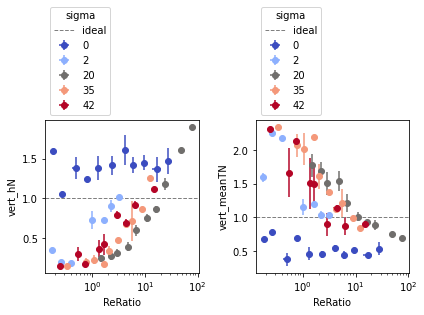

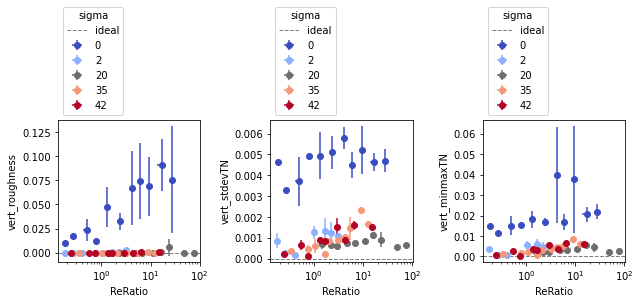

In [44]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.ink_base!='PEGDA_40']
ss1 = ss1.sort_values(by='sigma')
ss1 = ss1[ss1.vert_roughness_SE<0.05]
ss1 = ss1[ss1.vert_roughness<0.5]
for j,l in enumerate([['vert_hN', 'vert_meanTN'], ['vert_roughness', 'vert_stdevTN', 'vert_minmaxTN']]):
    fig,axs = plt.subplots(1,len(l),figsize=(3*len(l),6))
    for i,s in enumerate(l):
    #     kwargs = {'logx':(i>1), 'logy':False, 'gradColor':False,\
    #               'dx':0.1, 'dy':1, 'cmapname':'coolwarm', \
    #               'yideal':0, 'ax':axs[i], 'fig':fig}
        mp.scatterSS(ss1, 'ReRatio', s, 'sigma', logx=True, yideal=[1,0][j], ax=axs[i], fig=fig)
    fig.tight_layout()

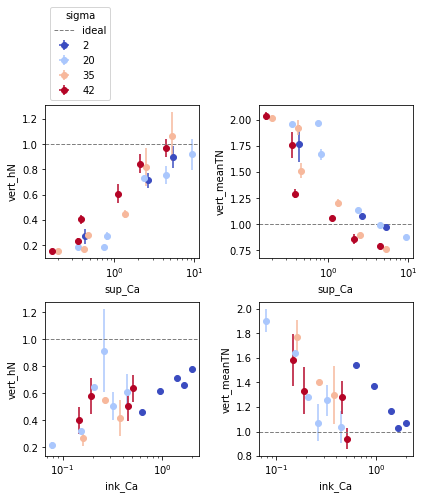

In [736]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.sigma>0]
ss1 = ss1.sort_values(by='sigma')
ss1['sup_Ca'] = 1/ss1['sup_CaInv']
ss1['ink_Ca'] = 1/ss1['ink_CaInv']
fig,axs = plt.subplots(2,2,figsize=(6,7))
for j,s2 in enumerate(['sup_Ca', 'ink_Ca']):
    for i,s in enumerate(['vert_hN', 'vert_meanTN']):
        mp.scatterSS(ss1, s2, s, 'sigma', logx=True, yideal=1, ax=axs[j][i], fig=fig, legend=(i==0 and j==0))
fig.tight_layout()

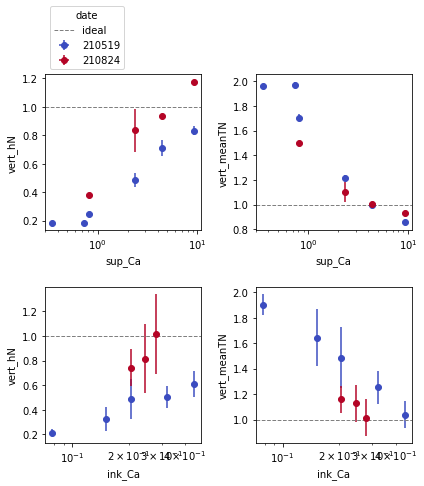

In [85]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.sigma==20]
ss1 = ss1.sort_values(by='sigma')
ss1['sup_Ca'] = 1/ss1['sup_CaInv']
ss1['ink_Ca'] = 1/ss1['ink_CaInv']
fig,axs = plt.subplots(2,2,figsize=(6,7))
for j,s2 in enumerate(['sup_Ca', 'ink_Ca']):
    for i,s in enumerate(['vert_hN', 'vert_meanTN']):
        mp.scatterSS(ss1, s2, s, 'date', logx=True, yideal=1, ax=axs[j][i], fig=fig, legend=(i==0 and j==0), dx=0.1)
fig.tight_layout()

In [6]:
ss1[ss1.vert_hN>2.5]

,bn,date,sigma,di,do,fluFile,calibFile,viscRatio,vRatio,ReRatio,...,horiz_stdevTN,horiz_minmaxTN,horiz_maxlenN_SE,horiz_totlenN_SE,horiz_vN_SE,horiz_roughness_SE,horiz_meanTN_SE,horiz_stdevTN_SE,horiz_minmaxTN_SE,vHorizEst
335,I_2.75_S_2.75_VI_7.5_VS_2.5_210824,210824,0,0.603,0.907,True,True,0.089978,3.0,22.166338,...,0.001262,0.007402,0.019897,0.019897,0.127038,0.051564,0.086337,0.000165,0.000623,0.502739
331,I_2.75_S_2.75_VI_5_VS_2.5_210824,210824,0,0.603,0.907,True,True,0.130157,2.0,10.215834,...,0.001952,0.010647,0.142758,0.051020,0.034148,0.054773,0.055472,0.000253,0.001337,0.293725
323,I_2.75_S_2.75_VI_10_VS_2.5_210824,210824,0,0.603,0.907,True,True,0.069246,4.0,38.403709,...,0.001214,0.006754,0.033058,0.033058,0.193531,0.050814,0.109500,0.000093,0.000939,0.709282


Text(0.5, 0.98, 'LapRD LapRD')

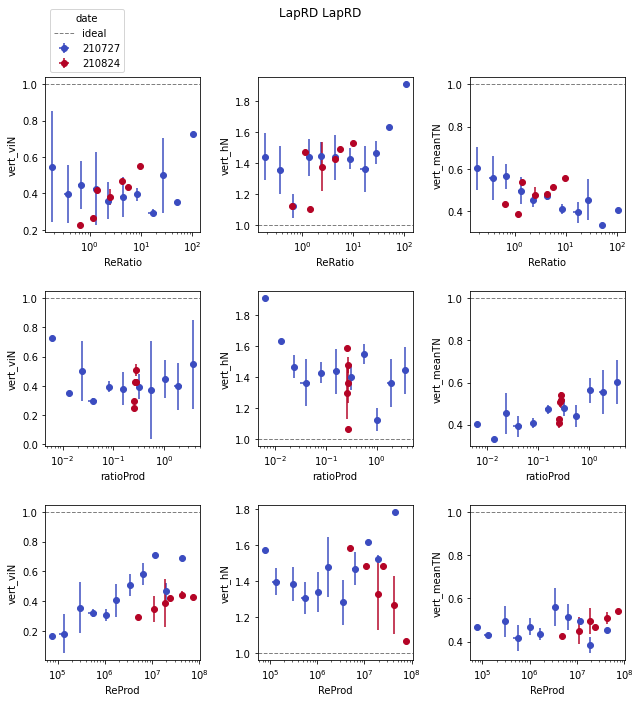

In [86]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.ink_base=='water']
ss1 = ss1[ss1.ink_days==1]
# ss1 = ss1[ss1.sup_v>2.5]
# ss1 = ss1[ss1.vert_hN_SE<0.5]
ss1 = ss1.sort_values(by='date')
ss1['ratioProd'] = ss1['vRatio']*ss1['viscRatio']
ss1['ReProd'] = ss1['ink_Re']*ss1['sup_Re']
fig,axs = plt.subplots(3,3,figsize=(9,10))
for i,s2 in enumerate(['ReRatio', 'ratioProd', 'ReProd']):
    for j,s in enumerate(['vert_viN', 'vert_hN', 'vert_meanTN']):
        mp.scatterSS(ss1, s2, s, 'date', logx=(True), yideal=1, ax=axs[i][j], fig=fig, legend=(i==0 and j==0), dx=0.1)
fig.tight_layout()
fig.suptitle('LapRD LapRD')

In [25]:
ss1[ss1.vert_viN>0.6]

,bn,date,sigma,di,do,fluFile,calibFile,viscRatio,vRatio,ReRatio,...,horiz_totlenN_SE,horiz_vN_SE,horiz_roughness_SE,horiz_meanTN_SE,horiz_stdevTN_SE,horiz_minmaxTN_SE,vHorizEst,ratioProd,ReProd,pratio
0,I_2.25_S_2.25_210727,210727,0,0.603,0.907,True,True,0.164457,1.0,4.042581,...,0.010982,1.365575,0.017636,0.222372,0.001024,0.002863,1.364334,0.164457,4.341792e+07,0.992987
34,I_4.00_S_2.75_210727,210727,0,0.603,0.907,True,True,3.728383,1.0,0.182487,...,0.084786,0.135304,0.008175,0.068247,0.000739,0.001566,1.662001,3.728383,3.529891e+05,1.000995
18,I_3.00_S_2.25_210727,210727,0,0.603,0.907,True,True,2.515771,1.0,0.266676,...,0.004220,0.250303,0.007155,0.091758,0.000093,0.000802,-6.970443,2.515771,2.864145e+06,0.999401
5,I_2.25_S_4.00_210727,210727,0,0.603,0.907,True,True,0.006239,1.0,105.832383,...,0.264527,1.277660,0.328456,0.178888,0.000194,0.003236,0.756143,0.006239,1.658476e+06,1.554764
6,I_2.50_S_2.25_210727,210727,0,0.603,0.907,True,True,0.830364,1.0,0.786833,...,0.012848,0.228072,0.011190,0.101068,0.000289,0.001015,1.542801,0.830364,8.450706e+06,0.998182
12,I_2.75_S_2.25_210727,210727,0,0.603,0.907,True,True,0.601219,1.0,1.087906,...,0.031255,0.219409,0.004828,0.082715,0.000258,0.000739,1.452021,0.601219,1.168427e+07,0.997996
3,I_2.25_S_3.00_210728,210728,0,0.603,0.907,True,True,0.024572,1.0,26.811720,...,0.030047,0.757125,0.052630,0.193467,0.000921,0.000715,1.245784,0.024572,6.546408e+06,1.039081


In [72]:
ss1[['bn','vRatio', 'viscRatio', 'ReRatio', 'ink_v', 'sup_v', 'vert_viN', 'vert_wN']]

,bn,vRatio,viscRatio,ReRatio,ink_v,sup_v,vert_viN,vert_wN
322,I_2.75_S_2.75_VI_10_VS_10_210824,1.000000,0.274929,2.418189,10.0,10.0,0.426416,1.338172
323,I_2.75_S_2.75_VI_10_VS_5_210824,2.000000,0.137978,9.636770,10.0,5.0,0.551896,1.319291
324,I_2.75_S_2.75_VI_10_VS_7.5_210824,1.333333,0.206516,4.292356,10.0,7.5,0.470039,1.289787
325,I_2.75_S_2.75_VI_2.5_VS_10_210824,0.250000,0.971475,0.171088,2.5,10.0,NaN,NaN
326,I_2.75_S_2.75_VI_2.5_VS_5_210824,0.500000,0.487551,0.681805,2.5,5.0,NaN,NaN
327,I_2.75_S_2.75_VI_2.5_VS_7.5_210824,0.333333,0.729734,0.303686,2.5,7.5,NaN,NaN
328,I_2.75_S_2.75_VI_5_VS_10_210824,0.500000,0.516760,0.643266,5.0,10.0,0.228733,1.604223
329,I_2.75_S_2.75_VI_5_VS_5_210824,1.000000,0.259345,2.563493,5.0,5.0,0.293794,1.244480
330,I_2.75_S_2.75_VI_5_VS_7.5_210824,0.666667,0.388170,1.141817,5.0,7.5,0.262648,1.602548
331,I_2.75_S_2.75_VI_7.5_VS_10_210824,0.750000,0.357240,1.395761,7.5,10.0,0.417101,1.752380


Text(0.5, 0.98, 'LapRD LapRD')

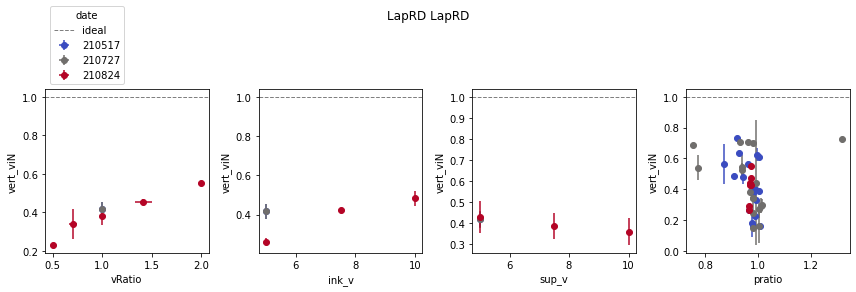

In [87]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.ink_base=='water']
# ss1 = ss1[ss1.ink_days==1]
# ss1 = ss1[ss1.sup_v>2.5]
# ss1 = ss1[ss1.vert_hN_SE<0.5]
# ss1 = ss1[ss1.date==210824]
ss1 = ss1.sort_values(by='date')
ss1['ratioProd'] = ss1['vRatio']*ss1['viscRatio']
ss1['ReProd'] = ss1['ink_Re']*ss1['sup_Re']
ss1['pratio'] = (ss1['pressureCh0'] -1000 + ss1['vDragP'] - 9.8*12.5)/(ss1['pressureCh0'])
fig,axs = plt.subplots(1,4,figsize=(12, 4))
for j,s2 in enumerate(['vRatio', 'ink_v', 'sup_v', 'pratio']):
    for i,s in enumerate(['vert_viN']):
        mp.scatterSS(ss1, s2, s, 'date', logx=False, yideal=1, ax=axs[j], fig=fig, legend=(i==0 and j==0), dx=0, dy=1)
fig.tight_layout()
fig.suptitle('LapRD LapRD')

In [42]:
ss1[ss1.vert_viN<0]

,bn,date,sigma,di,do,fluFile,calibFile,viscRatio,vRatio,ReRatio,...,horiz_totlenN_SE,horiz_vN_SE,horiz_roughness_SE,horiz_meanTN_SE,horiz_stdevTN_SE,horiz_minmaxTN_SE,vHorizEst,ratioProd,ReProd,pratio
123,I_4.00_S_3.00_210517,210517,0,0.603,0.907,True,True,3.451964,1.0,0.192156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.451964,206776.941428,1.001518
129,I_4.00_S_4.00_210517,210517,0,0.603,0.907,True,True,0.741080,1.0,0.897108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.741080,44290.633537,1.010978


Text(0.5, 0.98, 'LapRD LapRD')

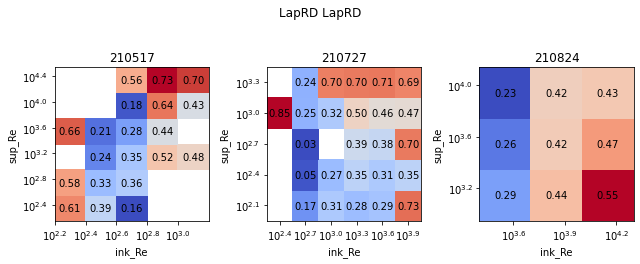

In [55]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.ink_base=='water']
# ss1 = ss1[ss1.ink_days==1]
# ss1 = ss1[ss1.sup_v>2.5]
# ss1 = ss1[ss1.vert_hN_SE<0.5]
ss1 = ss1.sort_values(by='date')
ss1['ratioProd'] = ss1['vRatio']*ss1['viscRatio']
ss1['ReProd'] = ss1['ink_Re']*ss1['sup_Re']
ss1['pratio'] = (ss1['pressureCh0'] + ss1['vDragP'] - 9.8*12.5)/(ss1['pressureCh0'])

dates = ss1.date.unique()
fig,axs = plt.subplots(1,len(dates),figsize=(3*(len(dates)), 4))
for j,d in enumerate(dates):
    ss2 = ss1[ss1.date==d]
    mp.colorMeshSS(ss2, 'ink_Re', 'sup_Re', 'vert_viN', logx=True, logy=True, ax=axs[j], fig=fig, legend=False, dx=0.05, dy=0.05)
    axs[j].set_title(d)
fig.tight_layout()
fig.suptitle('LapRD LapRD')

Text(0.5, 0.98, 'sigma>0')

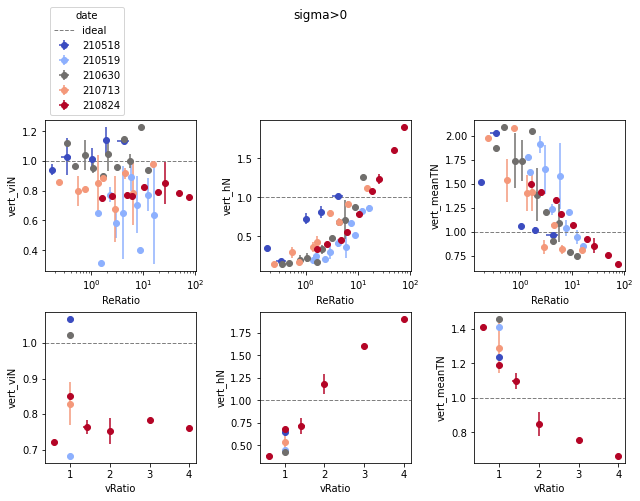

In [7]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.sigma>0]
# ss1 = ss1[ss1.sup_v>2.5]
# ss1 = ss1[ss1.vert_hN_SE<0.5]
ss1 = ss1.sort_values(by='date')
fig,axs = plt.subplots(2,3,figsize=(9,7))
for i,s2 in enumerate(['ReRatio', 'vRatio']):
    for j,s in enumerate(['vert_viN', 'vert_hN', 'vert_meanTN']):
        mp.scatterSS(ss1, s2, s, 'date', logx=(i==0), yideal=1, ax=axs[i][j], fig=fig, legend=(i==0 and j==0), dx=0.1)
fig.tight_layout()
fig.suptitle('sigma>0')

Text(0.5, 0.98, 'sigma>0')

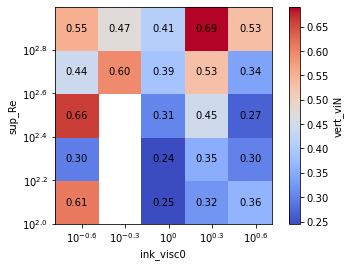

In [19]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.ink_base=='water']
ss1 = ss1[ss1.ink_days==1]
# ss1 = ss1[ss1.sup_v>2.5]
# ss1 = ss1[ss1.vert_hN_SE<0.5]
ss1 = ss1.sort_values(by='date')
mp.colorMeshSS(ss1, 'ink_visc0', 'sup_Re', 'vert_viN', logx=True, logy=True, dx=0.15, dy=0.15)
fig.tight_layout()
fig.suptitle('sigma>0')

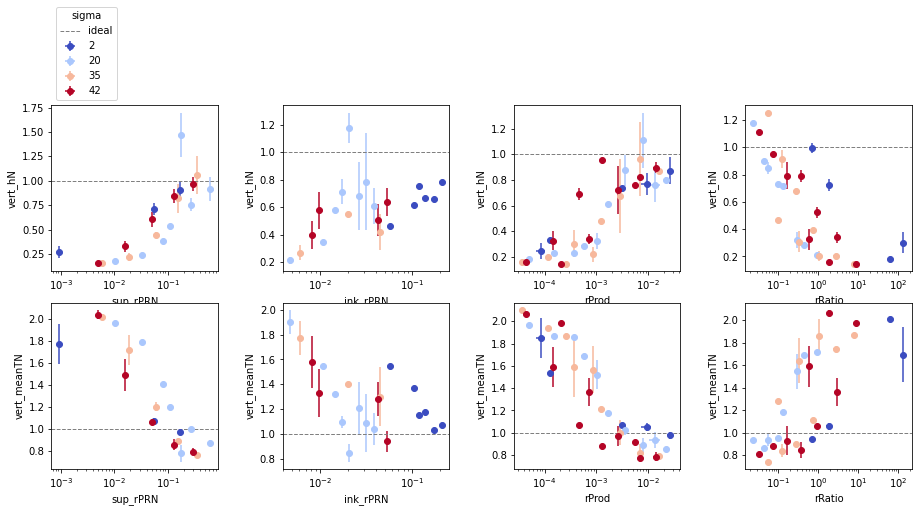

In [754]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.sigma>0]
ss1 = ss1.sort_values(by='sigma')
ss1['ink_rPRN'] = ss1['dEst']/ss1['ink_rPR']
ss1['sup_rPRN'] = ss1['dEst']/ss1['sup_rPR']
ss1['rProd'] = ss1['ink_rPRN']*ss1['sup_rPRN']
ss1['rRatio'] = ss1['ink_rPRN']/ss1['sup_rPRN']
fig,axs = plt.subplots(2,4,figsize=(13,7))
for j,s2 in enumerate(['vert_hN', 'vert_meanTN']):
    for i,s in enumerate(['sup_rPRN', 'ink_rPRN', 'rProd', 'rRatio']):
        mp.scatterSS(ss1, s, s2, 'sigma', logx=True, yideal=1, ax=axs[j][i], fig=fig, legend=(i==0 and j==0))
fig.tight_layout()

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2d4f9534c88>)

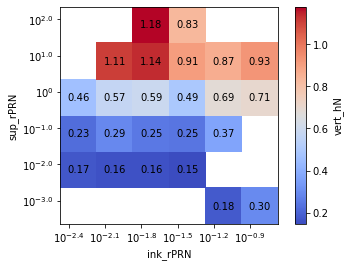

In [760]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.sigma>0]
ss1 = ss1.sort_values(by='sigma')
ss1['ink_rPRN'] = ss1['dEst']/ss1['ink_rPR']
ss1['sup_rPRN'] = ss1['dEst']/ss1['sup_rPR']
ss1['rProd'] = ss1['ink_rPRN']*ss1['sup_rPRN']
ss1['rRatio'] = ss1['ink_rPRN']/ss1['sup_rPRN']
mp.colorMeshSS(ss1, 'ink_rPRN', 'sup_rPRN', 'vert_hN', logx=True, logy=True, dx=0.18, dy=0.1)

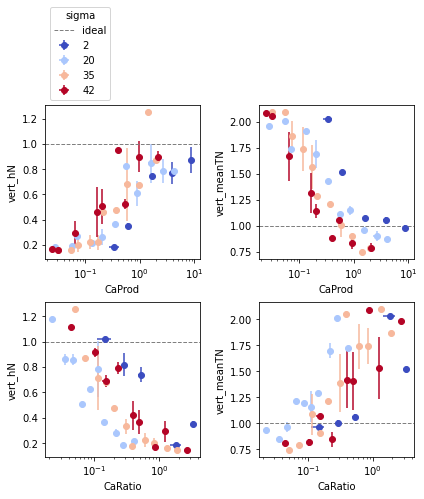

In [23]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.sigma>0]
ss1 = ss1.sort_values(by='sigma')
ss1['CaProd']=1/(ss1['sup_CaInv']*ss1['ink_CaInv'])
ss1['CaRatio']=ss1['sup_CaInv']/ss1['ink_CaInv']
fig,axs = plt.subplots(2,2,figsize=(6,7))
for j,s2 in enumerate(['CaProd', 'CaRatio']):
    for i,s in enumerate(['vert_hN', 'vert_meanTN']):
        mp.scatterSS(ss1, s2, s, 'sigma', logx=True, yideal=1, ax=axs[j][i], fig=fig, legend=(i==0 and j==0))
fig.tight_layout()

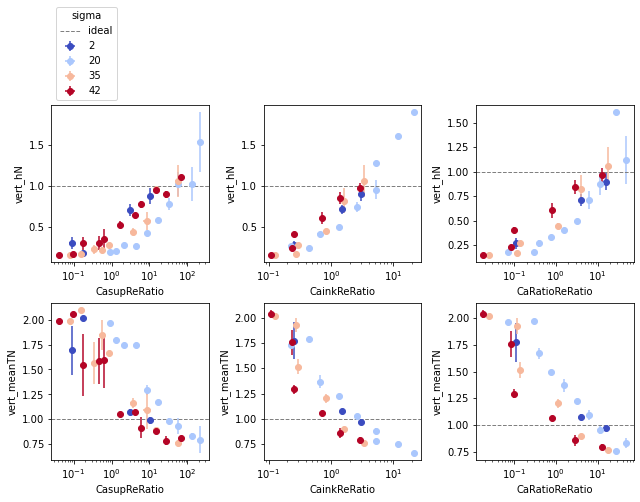

In [24]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.sigma>0]
ss1 = ss1.sort_values(by='sigma')
ss1['CasupReRatio']=ss1['ReRatio']/ss1['sup_CaInv']
ss1['CainkReRatio']=ss1['ReRatio']/ss1['ink_CaInv']
ss1['CaRatioReRatio']=ss1['ReRatio']/(ss1['sup_CaInv']*ss1['ink_CaInv'])
fig,axs = plt.subplots(2,3,figsize=(9,7))
for i,s2 in enumerate(['CasupReRatio', 'CainkReRatio', 'CaRatioReRatio']):
    for j,s in enumerate(['vert_hN', 'vert_meanTN']):
        mp.scatterSS(ss1, s2, s, 'sigma', logx=True, yideal=1, ax=axs[j][i], fig=fig, legend=(i==0 and j==0))
fig.tight_layout()

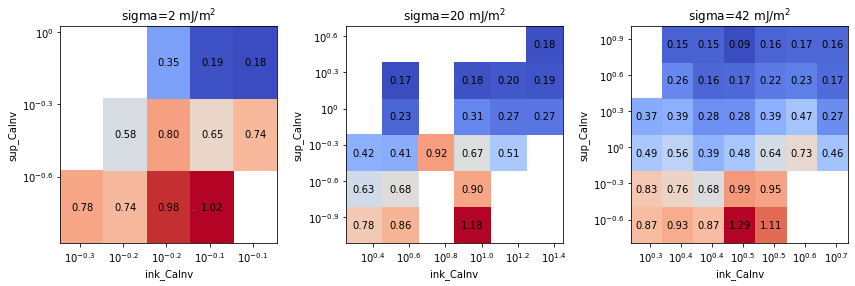

In [546]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.sigma>0]
ss1 = ss1.sort_values(by='sigma')
ss1['CaProd']=1/ss1['sup_CaInv']*ss1['ink_CaInv']
ss1['CaRatio']=ss1['sup_CaInv']/ss1['ink_CaInv']
fig,axs = plt.subplots(1,3,figsize=(12,6))
for i,s in enumerate([2, 20, 42]):
    ss2 = ss1[ss1.sigma==s]
    mp.colorMeshSS(ss2, 'ink_CaInv', 'sup_CaInv', 'vert_hN', logx=True, logy=True, ax=axs[i], fig=fig, legend=False)
    axs[i].set_title(f'sigma={s} mJ/m$^2$')
fig.tight_layout()